## in-vehicle-copoun-Recommendation Data Set

In [59]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import tkinter
matplotlib.use('TkAgg')
pd.set_option('SettingWithCopyWarning', None)

# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

OptionError: "No such keys(s): 'SettingWithCopyWarning'"

#### Load the data into pandas and explore the general characteristics

In [2]:
fileName = r'data/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(fileName, sep=',', na_values = ['?'])

# the first top 10 records
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# look at the last five records
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [4]:
#### DataFrame meta data

In [5]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
#### Transform the object data types to Categorical data types.

In [8]:
# df.select_dtypes(include=['object'])
inVechicle_obj = df.select_dtypes(include=['object']).copy() # get a copy of the object column names

# loop through the inVechicle_obj column names 
# and convert each column of the original data frame to the category data type  
for colName in inVechicle_obj.columns:
    df[colName] = df[colName].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

<p>There are 26 columns.</p>

In [9]:
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
#### unique values of the some of the categorical attributes

In [11]:
df['destination'].unique()

['No Urgent Place', 'Home', 'Work']
Categories (3, object): ['Home', 'No Urgent Place', 'Work']

In [12]:
df['passanger'].unique()

['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
Categories (4, object): ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']

In [13]:
df['weather'].unique()

['Sunny', 'Rainy', 'Snowy']
Categories (3, object): ['Rainy', 'Snowy', 'Sunny']

In [14]:
df['coupon'].unique()

['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
Categories (5, object): ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']

In [15]:
df['car'].unique()

[NaN, 'Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive', 'Car that is too old to install Onstar :D']
Categories (5, object): ['Car that is too old to install Onstar :D', 'Mazda5', 'Scooter and motorcycle', 'crossover', 'do not drive']

In [16]:
df['Bar'].unique()

['never', 'less1', '1~3', 'gt8', NaN, '4~8']
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [17]:
df['CoffeeHouse'].unique()

['never', 'less1', '4~8', '1~3', 'gt8', NaN]
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [18]:
df['occupation'].unique()

['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', ..., 'Protective Service', 'Food Preparation & Serving Related', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']
Length: 25
Categories (25, object): ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', ..., 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']

In [19]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

<p>We learn that toCoupon_GEQ5min has one unique value, which will not be beneficial to our analysis so we shall have to drop that attribute.</p>

#### Let's find out if we have any missing values

In [20]:
df.isnull()[0:10]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [21]:
#### determining the number of missing values in each column
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<p>Car, Bar, CoffeeHouse CarryAway,RestaurantLessThan20 and Restaurant20To50 have missing values.</p>

In [22]:
#### let's look at the percentages of missing values
df_na_sum = df.isna().sum()   # derive the number of missing values
df_na_sum[df_na_sum > 0]/len(df)  # let's do a subselection and only extract out where the values are greater than 0

car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

In [23]:
#### Drop the car attribute since it is 99% empty
df_ver1 = df.drop(columns='car', axis = 1) 

## Drop rows with NAs

In [24]:
df_ver2 = df_ver1.dropna()
df_ver2.shape

(12079, 25)

<p>Dropped all rows with missing values</p>

In [25]:
# check if there are still any missing values (NAs)
df_ver2.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### let's summarize the class distributiondf.values

In [26]:
# extract the last column, wich is the target class label
classLabel = df_ver2.values[:, -1]
classCollection = Counter(classLabel) 

for key, value in classCollection.items():
    percentDist = value / len(classLabel) * 100
    print('classLabel=%s, Count=%s, PercentDistribution=%s%%' %(key, value, round(percentDist,2)))

classLabel=1, Count=6877, PercentDistribution=56.93%
classLabel=0, Count=5202, PercentDistribution=43.07%


<p>We learn that attribute Y consists of two classes whose distribution amongest the data set is shown above.</p>

#### Distribution charts of all the categorical data types

In [27]:
df_ver2.select_dtypes('category').columns

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

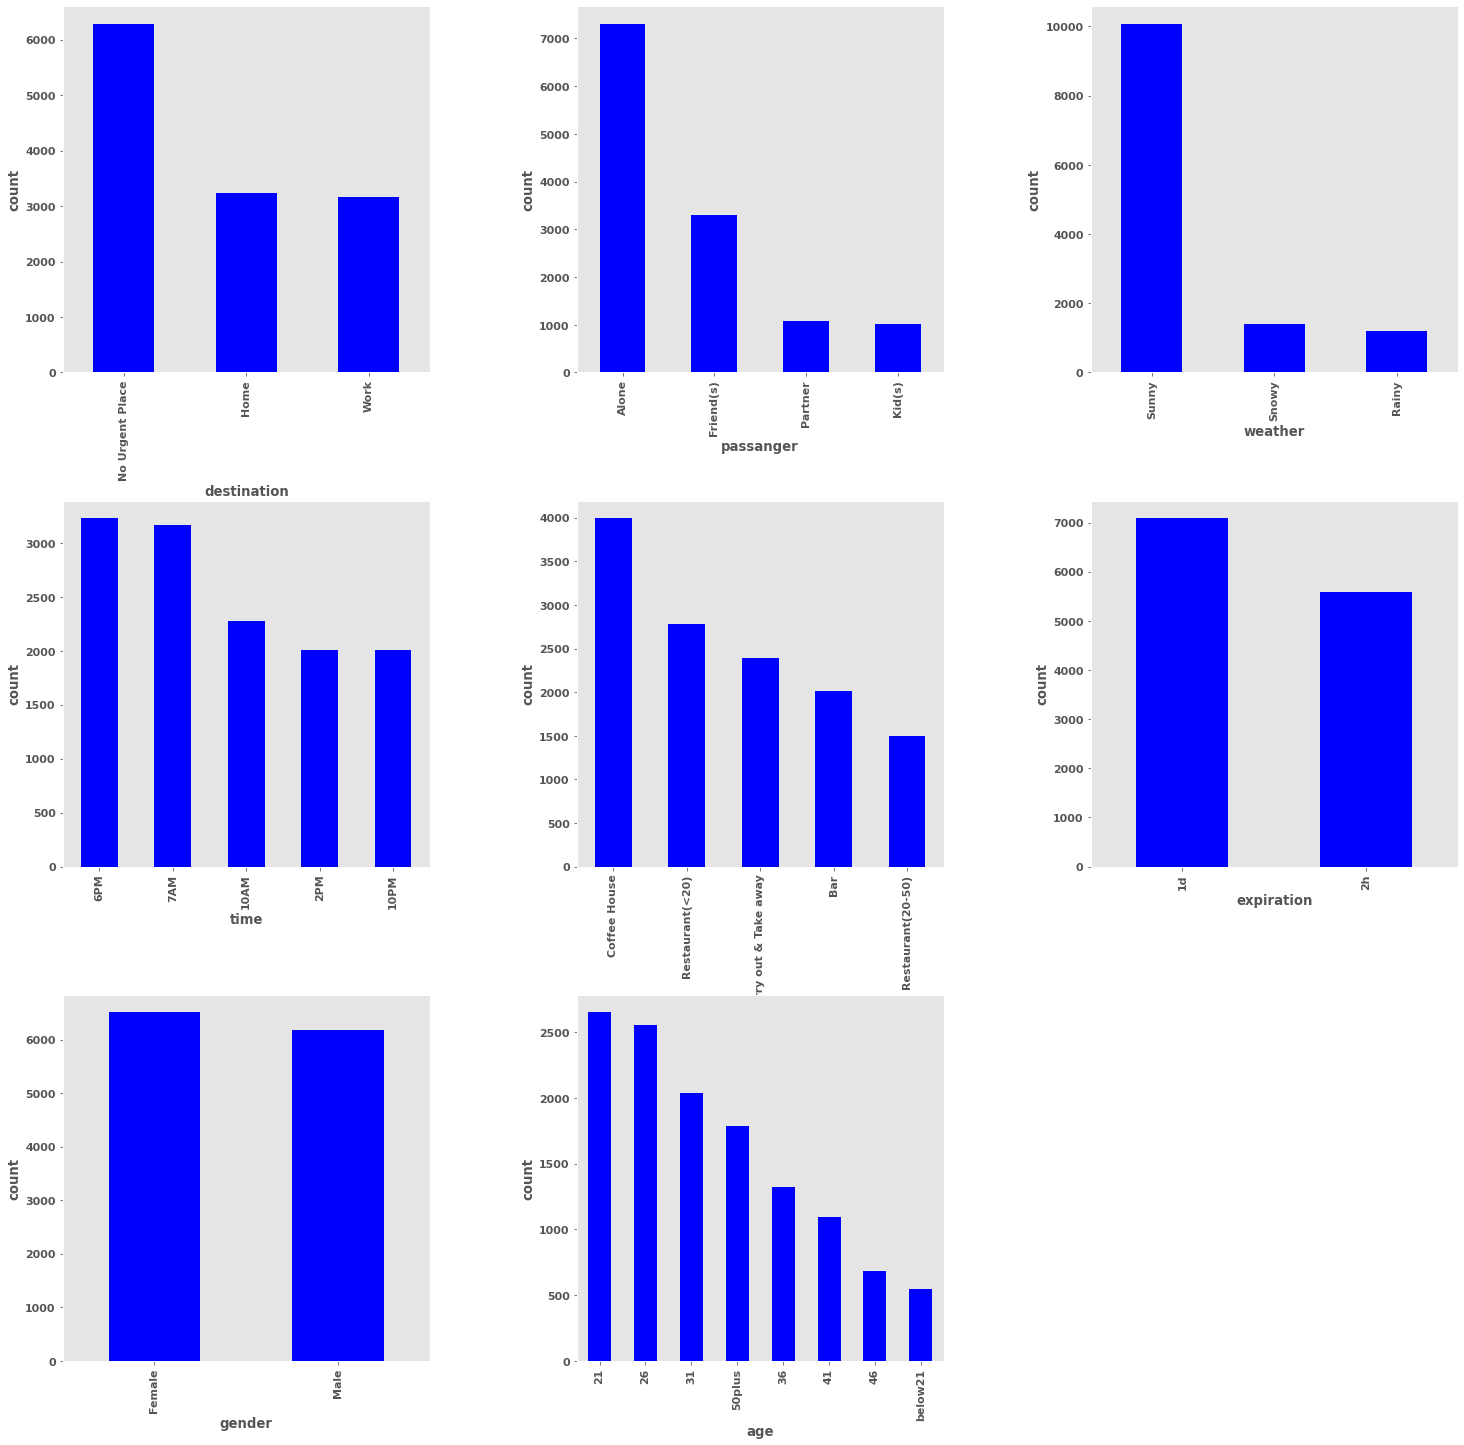

In [28]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.


fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -7.0, wspace = 0.4, hspace = 0.35) # add space between each row of the subplots

inVechCategorical_df = df_ver2.select_dtypes(include=['category']).copy()
# extract out all the column names
categorical_attrs = inVechCategorical_df.columns

axisnum = 0
#type(categorical_attrs)
for i in range(len(categorical_attrs)-9):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    
    

    df[categorical_attrs[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = categorical_attrs[i], ylabel = 'count')

       
plt.show()

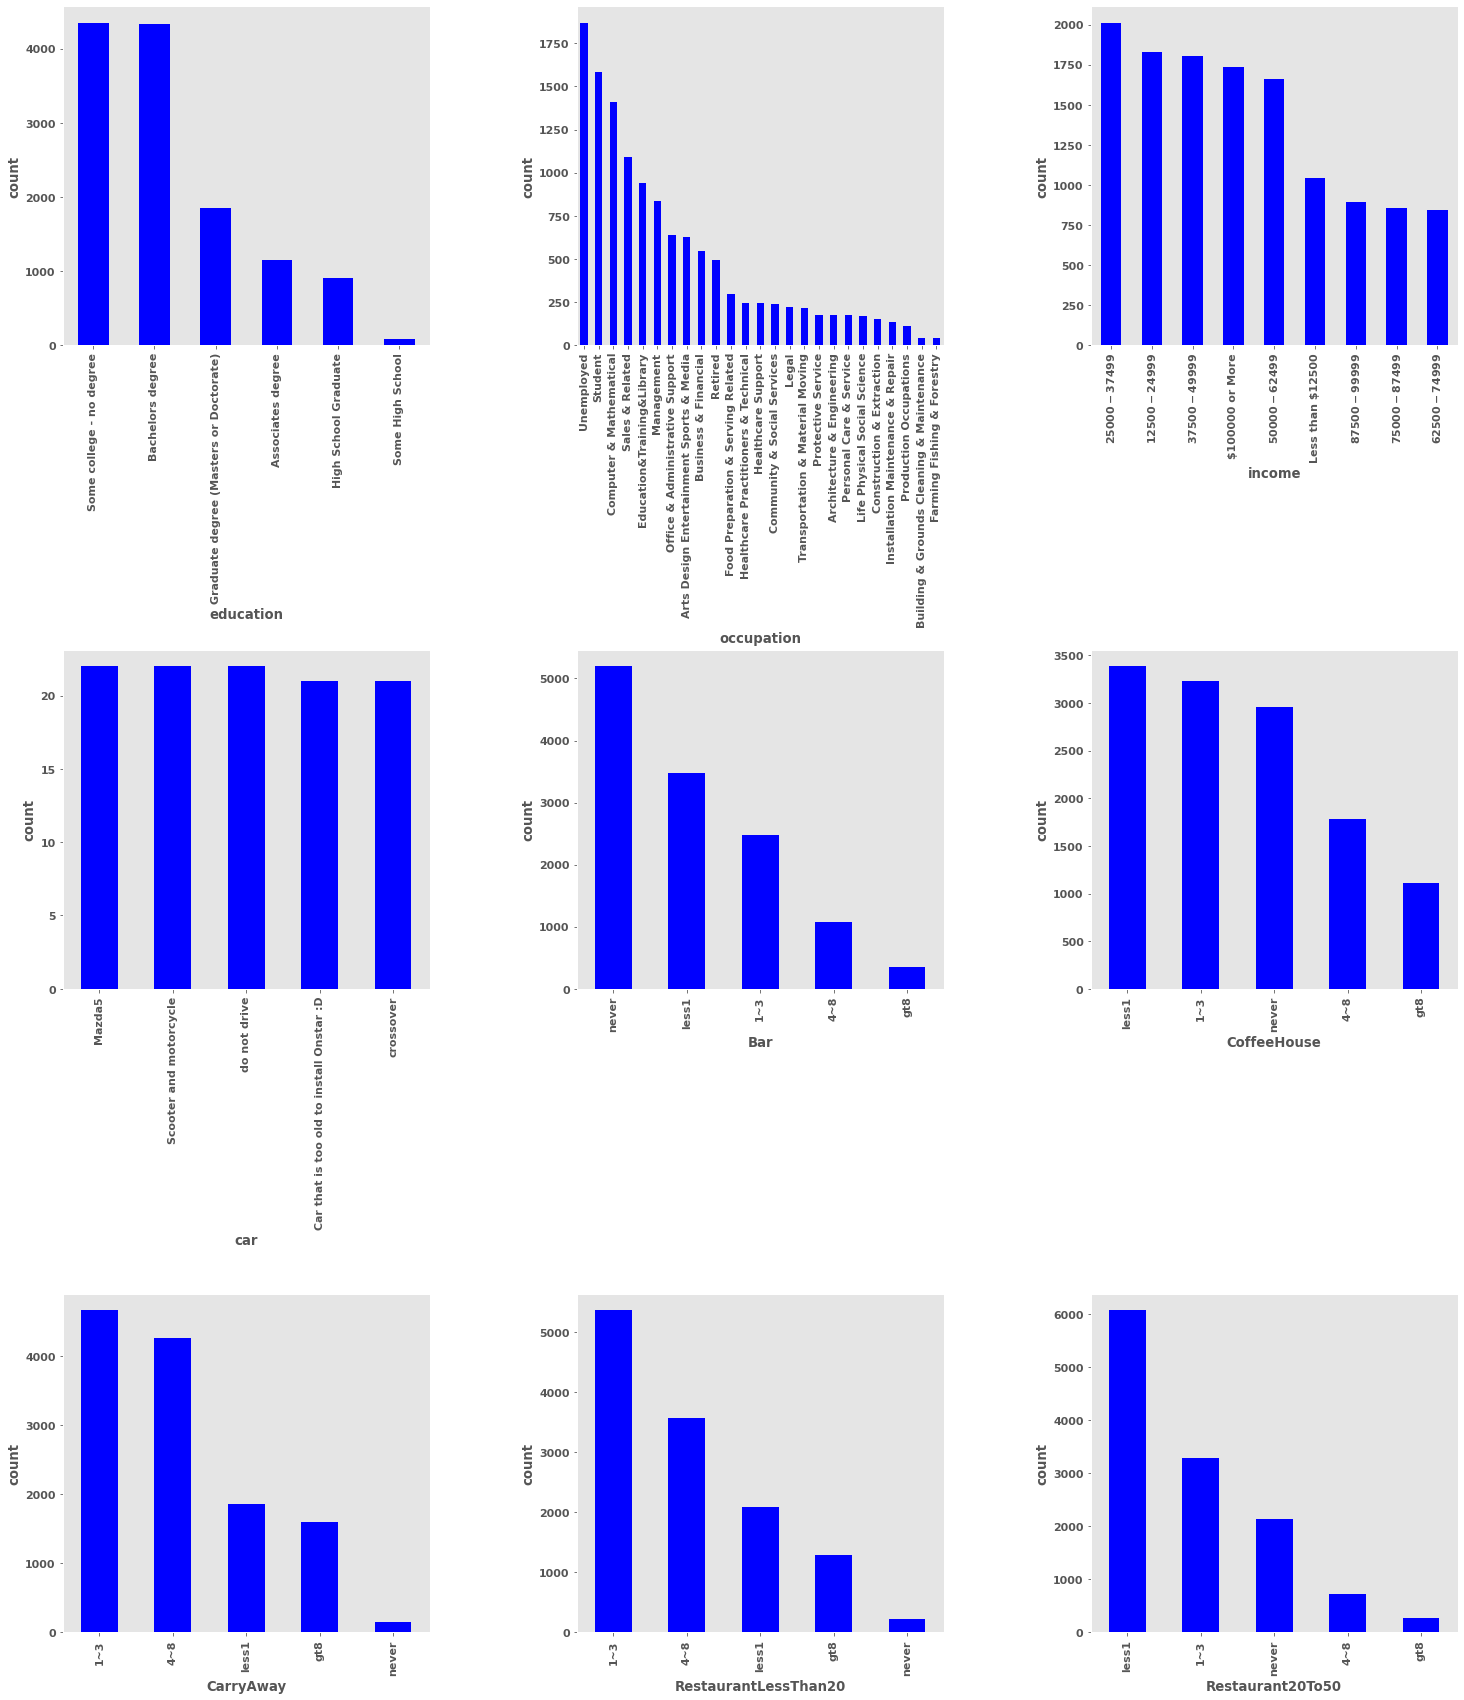

In [29]:
 CategoricalRe = ['education', 'occupation', 'income','car', 'Bar'
                  , 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
    
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.

fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -9, wspace = 0.4, hspace = 0.9) # add space between each row of the subplots

#inVechCategorical_df = df.select_dtypes(include=['category']).copy()
# extract out all the column names
#categorical_attrs = inVechCategorical_df.columns
axisnum = 0
#type(categorical_attrs)
for i in range(len(CategoricalRe)):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    df[CategoricalRe[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = CategoricalRe[i], ylabel = 'count')
plt.show()
    
    

In [30]:
all_attrs_subselection = df_ver2.drop('Y', axis=1).columns
all_attrs_subselection

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

Y,0,1
education,,
Some college - no degree,1711,2508
Bachelors degree,1784,2237
Graduate degree (Masters or Doctorate),856,952
Associates degree,470,596
High School Graduate,356,521
Some High School,25,63


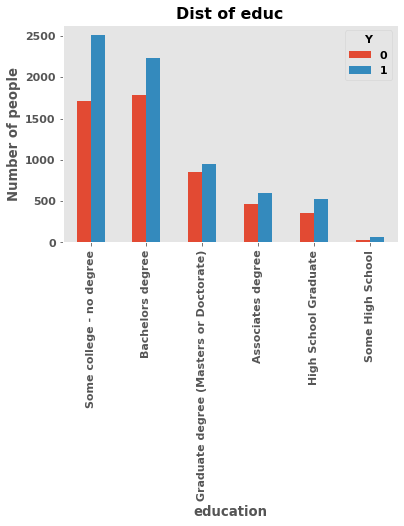

In [31]:
df_education = pd.crosstab(df_ver2.education, df_ver2.Y)
df_educationSorted = df_education.sort_values(1, ascending = False)
df_educationSorted.plot(kind = 'bar', xlabel = 'education', ylabel = 'Number of people', grid = False, title = 'Dist of educ');
df_educationSorted

<p>Some college - no degree category had the highest number of people who accepted a coupon. Also, we observe that they are a less number of high schoolers that accepted a coupon. </p>

Y,0,1
destination,,
No Urgent Place,2185,3785
Home,1517,1568
Work,1500,1524


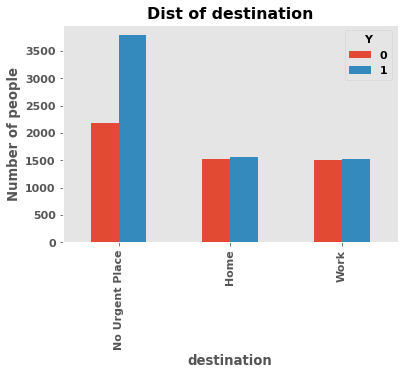

In [32]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_dest = pd.crosstab(df_ver2.destination, df_ver2.Y)
df_destSorted = df_dest.sort_values(1, ascending = False)
df_destSorted.plot(kind = 'bar', xlabel = 'destination', ylabel = 'Number of people', grid = False, title = 'Dist of destination');
df_destSorted

#### The bar charts above show the distribution of the categorical frequencies in our data set. 
<p>In the destination bar chart when you look at the number of people that accepted a coupon, all those folks whose destination was in the <strong>No urgent Place </stronG>category had the highest number of frequency when compared with Home and Work destination categories. <p>


Y,0,1
weather,,
Sunny,3888,5713
Snowy,697,634
Rainy,617,530


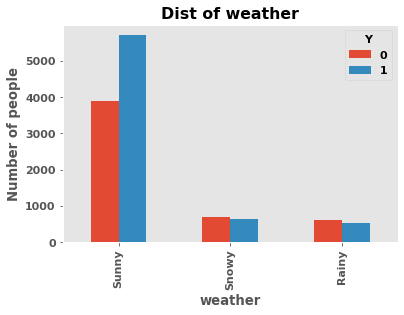

In [33]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_weather = pd.crosstab(df_ver2.weather, df_ver2.Y)
df_weatherSorted = df_weather.sort_values(1, ascending = False)
df_weatherSorted.plot(kind = 'bar', xlabel = 'weather', ylabel = 'Number of people', grid = False, title = 'Dist of weather');
df_weatherSorted

<p>Looking at the Dist of Weather bar chart, they were more people that accepted a coupon on a sunny day compared to Rainy and Snowy days.</p>

Y,0,1
temperature,,
80,2491,3731
55,1695,1967
30,1016,1179


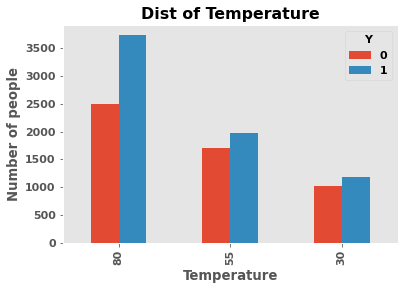

In [34]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_temperature = pd.crosstab(df_ver2.temperature, df_ver2.Y)
df_temperatureSorted = df_temperature.sort_values(1, ascending = False)
df_temperatureSorted.plot(kind = 'bar', xlabel = 'Temperature', ylabel = 'Number of people', grid = False, title = 'Dist of Temperature');
df_temperatureSorted

<p>We learn that when the temperature was high, in the 80s, they were more people that accepted a coupon.</p>

Y,0,1
time,,
6PM,1284,1794
7AM,1500,1524
10AM,846,1312
2PM,650,1266
10PM,922,981


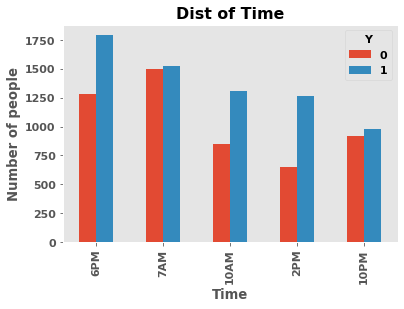

In [35]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_time = pd.crosstab(df_ver2.time, df_ver2.Y)
df_timeSorted = df_time.sort_values(1, ascending = False)
df_timeSorted.plot(kind = 'bar', xlabel = 'Time', ylabel = 'Number of people', grid = False, title = 'Dist of Time');
df_timeSorted

<p>Amongst the different times of the day, 6pm had the highest number of people who accepted a coupon.</p>

Y,0,1
expiration,,
1d,2516,4244
2h,2686,2633


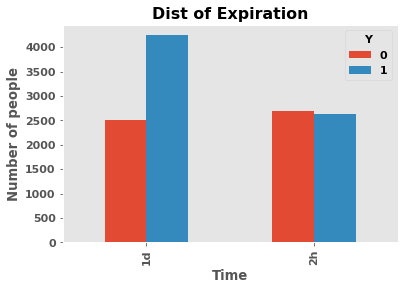

In [36]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_expiration = pd.crosstab(df_ver2.expiration, df_ver2.Y)
df_expiration.plot(kind = 'bar', xlabel = 'Time', ylabel = 'Number of people', grid = False, title = 'Dist of Expiration');
df_expiration

<p>Amajority of the coupons issued were expiring within 1 day. </p>

Y,0,1
gender,,
Female,2805,3394
Male,2397,3483


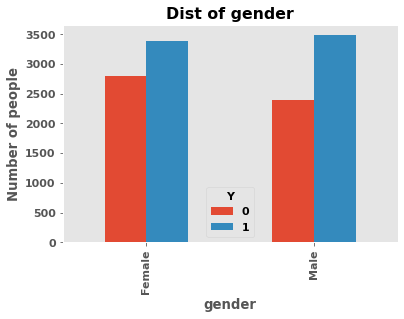

In [37]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_gender = pd.crosstab(df_ver2.gender, df_ver2.Y)
df_gender.plot(kind = 'bar', xlabel = 'gender', ylabel = 'Number of people', grid = False, title = 'Dist of gender');
df_gender

<p>Compared to males, they were more females that accepted a coupon.<p>

Y,0,1
maritalStatus,,
Single,1788,2800
Married partner,2208,2623
Unmarried partner,910,1138
Divorced,239,265
Widowed,57,51


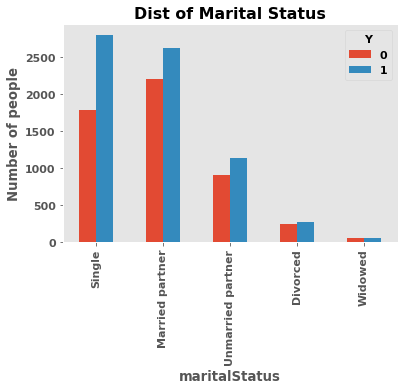

In [38]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_maritalStatus = pd.crosstab(df_ver2.maritalStatus, df_ver2.Y)
df_maritalStatusSorted = df_maritalStatus.sort_values(1, ascending = False)
df_maritalStatusSorted.plot(kind = 'bar', xlabel = 'maritalStatus', ylabel = 'Number of people', grid = False, title = 'Dist of Marital Status');
df_maritalStatusSorted

<p>A good number of singles accepted a coupon.</p>

Y,0,1
has_children,,
0,2935,4210
1,2267,2667


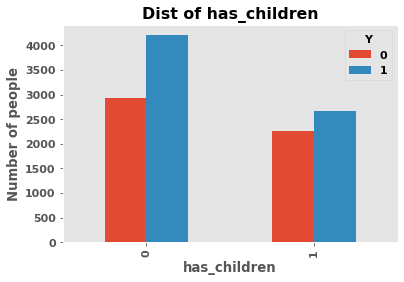

In [39]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_haschildren = pd.crosstab(df_ver2.has_children, df_ver2.Y)
df_haschildren.plot(kind = 'bar', xlabel = 'has_children', ylabel = 'Number of people', grid = False, title = 'Dist of has_children');
df_haschildren

<p>The number of people without children accepted more coupons than those with children.</p>

Y,0,1
occupation,,
Unemployed,824,990
Student,586,911
Computer & Mathematical,597,771
Sales & Related,468,604
Management,314,458
Education&Training&Library,416,439
Office & Administrative Support,245,372
Arts Design Entertainment Sports & Media,263,301
Business & Financial,222,294


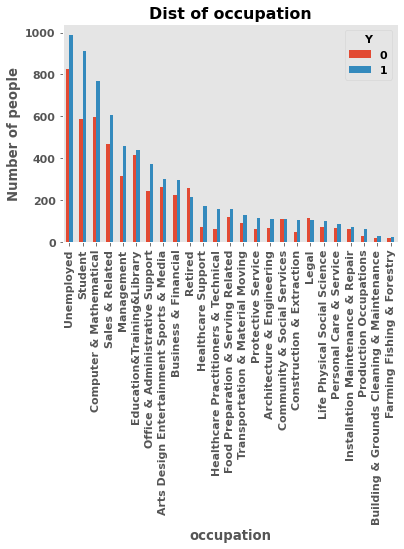

In [40]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_occupation = pd.crosstab(df_ver2.occupation, df_ver2.Y)
df_occupationSorted = df_occupation.sort_values(1, ascending = False)
df_occupationSorted.plot(kind = 'bar', xlabel = 'occupation', ylabel = 'Number of people', grid = False, title = 'Dist of occupation');
df_occupationSorted

<p>Compared to other occupations,the unemployed accepted more coupons.</p>

Y,0,1
income,,
$25000 - $37499,773,1146
$12500 - $24999,730,998
$100000 or More,714,978
$37500 - $49999,725,964
$50000 - $62499,642,923
Less than $12500,418,596
$62500 - $74999,397,443
$87500 - $99999,390,428
$75000 - $87499,413,401


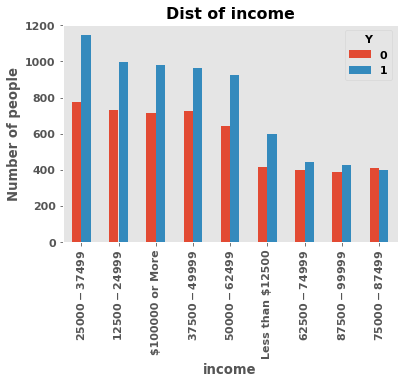

In [41]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_income = pd.crosstab(df_ver2.income, df_ver2.Y)
df_incomeSorted = df_income.sort_values(1, ascending = False)
df_incomeSorted.plot(kind = 'bar', xlabel = 'income', ylabel = 'Number of people', grid = False, title = 'Dist of income');
df_incomeSorted

Y,0,1
Bar,,
never,2325,2609
less1,1465,1929
1~3,889,1481
4~8,382,672
gt8,141,186


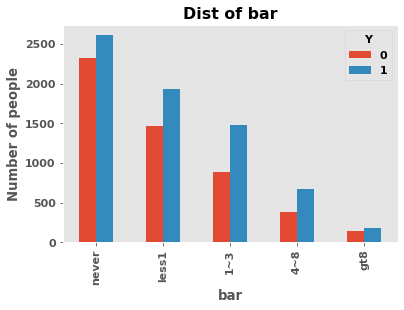

In [42]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_Bar = pd.crosstab(df_ver2.Bar, df_ver2.Y)
df_BarSorted = df_Bar.sort_values(1, ascending = False)
df_BarSorted.plot(kind = 'bar', xlabel = 'bar', ylabel = 'Number of people', grid = False, title = 'Dist of bar');
df_BarSorted

<p>The biggest number of people who never visted a bar received more coupons compared to those that visit it less than once or 1 to 3 times or 4 to 8 times.</p>

Y,0,1
Bar,,
never,2325,2609
less1,1465,1929
1~3,889,1481
4~8,382,672
gt8,141,186


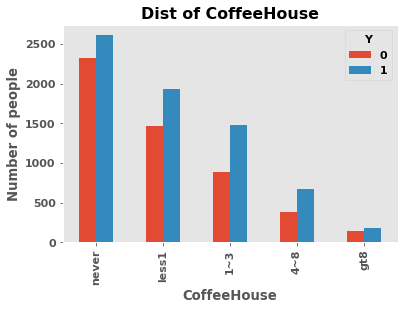

In [43]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_CoffeeHouse = pd.crosstab(df_ver2.CoffeeHouse, df_ver2.Y)
df_CoffeeHouseSorted = df_Bar.sort_values(1, ascending = False)
df_CoffeeHouseSorted.plot(kind = 'bar', xlabel = 'CoffeeHouse', ylabel = 'Number of people', grid = False, title = 'Dist of CoffeeHouse');
df_CoffeeHouseSorted

<p>Comment on the above chart</p>

Y,0,1
CarryAway,,
1~3,1879,2623
4~8,1713,2370
gt8,660,913
less1,891,899
never,59,72


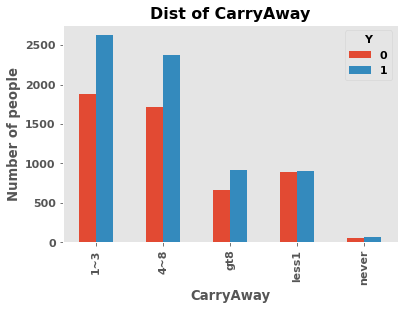

In [44]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_CarryAway = pd.crosstab(df_ver2.CarryAway, df_ver2.Y)
df_CarryAwaySorted = df_CarryAway.sort_values(1, ascending = False)
df_CarryAwaySorted.plot(kind = 'bar', xlabel = 'CarryAway', ylabel = 'Number of people', grid = False, title = 'Dist of CarryAway');
df_CarryAwaySorted

<p>Comment above graph</p>

Y,0,1
RestaurantLessThan20,,
1~3,2261,2902
4~8,1438,2012
less1,926,1079
gt8,504,781
never,73,103


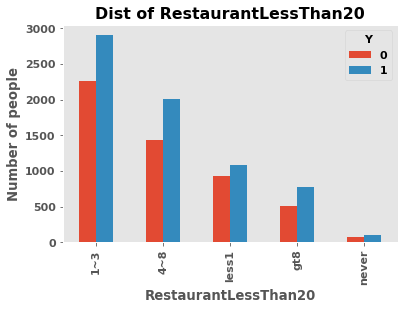

In [45]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_RestaurantLessThan20 = pd.crosstab(df_ver2.RestaurantLessThan20, df_ver2.Y)
df_RestaurantLessThan20Sorted = df_RestaurantLessThan20.sort_values(1, ascending = False)
df_RestaurantLessThan20Sorted.plot(kind = 'bar', xlabel = 'RestaurantLessThan20', ylabel = 'Number of people', grid = False, title = 'Dist of RestaurantLessThan20');
df_RestaurantLessThan20Sorted

<p>Comment above bar chart</p>

Y,0,1
Restaurant20To50,,
less1,2587,3272
1~3,1289,1913
never,1000,1070
4~8,237,447
gt8,89,175


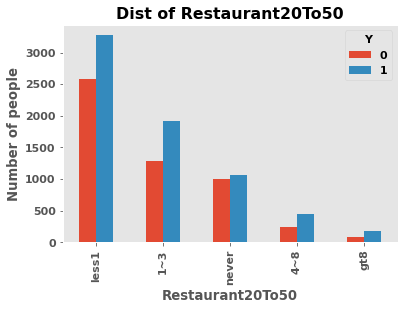

In [46]:
df_Restaurant20To50 = pd.crosstab(df_ver2.Restaurant20To50, df_ver2.Y)
df_Restaurant20To50Sorted = df_Restaurant20To50.sort_values(1, ascending = False)
df_Restaurant20To50Sorted.plot(kind = 'bar', xlabel = 'Restaurant20To50', ylabel = 'Number of people', grid = False, title = 'Dist of Restaurant20To50');
df_Restaurant20To50Sorted

<p>Comment the above bar chart.</p>

Y,0,1
toCoupon_GEQ5min,,
1,5202,6877


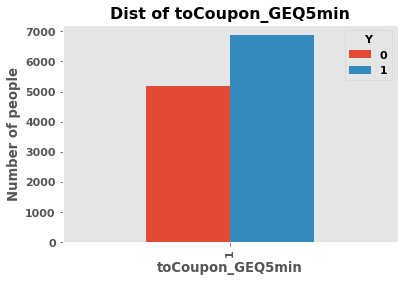

In [47]:
df_toCoupon_GEQ5min = pd.crosstab(df_ver2.toCoupon_GEQ5min, df_ver2.Y)
df_toCoupon_GEQ5minSorted = df_toCoupon_GEQ5min.sort_values(1, ascending = False)
df_toCoupon_GEQ5minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ5min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ5min');
df_toCoupon_GEQ5minSorted

<p>Comment on the above chart</p>

Y,0,1
toCoupon_GEQ15min,,
1,3162,3617
0,2040,3260


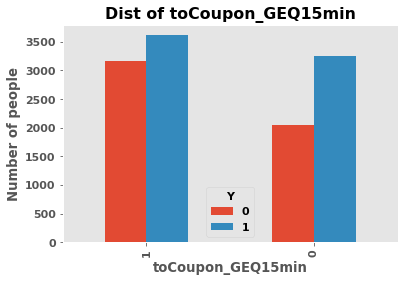

In [48]:
df_toCoupon_GEQ15min = pd.crosstab(df_ver2.toCoupon_GEQ15min, df_ver2.Y)
df_toCoupon_GEQ15minSorted = df_toCoupon_GEQ15min.sort_values(1, ascending = False)
df_toCoupon_GEQ15minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ15min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ15min');
df_toCoupon_GEQ15minSorted

<p>Comment on the above bar chart.</p>

Y,0,1
toCoupon_GEQ15min,,
1,3162,3617
0,2040,3260


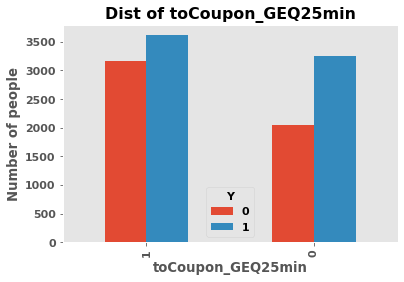

In [49]:
df_toCoupon_GEQ25min = pd.crosstab(df_ver2.toCoupon_GEQ25min, df_ver2.Y)
df_toCoupon_GEQ25minSorted = df_toCoupon_GEQ15min.sort_values(1, ascending = False)
df_toCoupon_GEQ25minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ25min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ25min');
df_toCoupon_GEQ25minSorted

<p>Comment on the above bar chart</p>

Y,0,1
direction_same,,
0,4118,5362
1,1084,1515


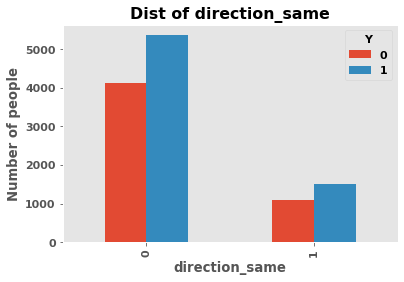

In [50]:
df_direction_same = pd.crosstab(df_ver2.direction_same, df_ver2.Y)
df_direction_sameSorted = df_direction_same.sort_values(1, ascending = False)
df_direction_sameSorted.plot(kind = 'bar', xlabel = 'direction_same', ylabel = 'Number of people', grid = False, title = 'Dist of direction_same');
df_direction_sameSorted

<p>Comment on the above</p>

Y,0,1
direction_opp,,
1,4118,5362
0,1084,1515


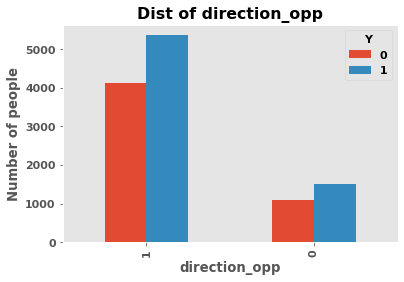

In [51]:
df_direction_opp = pd.crosstab(df_ver2.direction_opp, df_ver2.Y)
df_direction_oppSorted = df_direction_opp.sort_values(1, ascending = False)
df_direction_oppSorted.plot(kind = 'bar', xlabel = 'direction_opp', ylabel = 'Number of people', grid = False, title = 'Dist of direction_opp');
df_direction_oppSorted

<p>Commen on the above.</p>

Y,0,1
age,,
21,1030,1507
26,960,1439
31,862,1063
50plus,853,879
36,578,675
41,453,612
46,281,383
below21,185,319


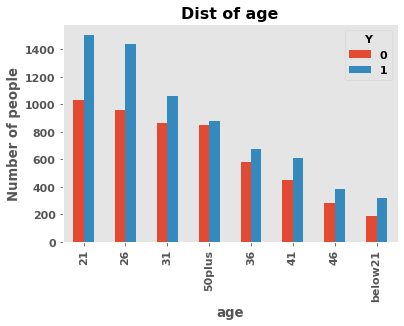

In [52]:
df_age = pd.crosstab(df_ver2.age, df_ver2.Y)
df_ageSorted = df_age.sort_values(1, ascending = False)
df_ageSorted.plot(kind = 'bar', xlabel = 'age', ylabel = 'Number of people', grid = False, title = 'Dist of age');
df_ageSorted

<p>When compared to other ages, the number of 21 year olds that accepted a coupon was the highest.</p>

# Transforming the Data 

###### First reset the index

In [53]:
df_ver2.reset_index(drop=True, inplace=True)

In [54]:
df_ver2.loc[df_ver2.time == '7AM', 'timec'] = 0
df_ver2.loc[df_ver2.time == '10AM', 'timec'] = 1
df_ver2.loc[df_ver2.time == '2PM', 'timec'] = 2
df_ver2.loc[df_ver2.time == '6PM', 'timec'] = 3
df_ver2.loc[df_ver2.time == '10PM', 'timec'] = 4

C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
def parse_values(x):
    if x == 'Unmarried partner':
       return 'Unmarried'
    elif x == 'Divorced':
       return 'Unmarried'
    elif x == 'Widowed':
       return 'Unmarried'
    else:
        return x

# df['one'].apply(parse_values)

In [56]:
# df_ver2.columns[9]
mask = df_ver2.iloc[[0:df_ver2.shape[0] - 1], 9] == 'Unmarried partner'
# 
df_ver2[mask, 'test'] = 'Unmarried'

# time7AM = df_ver2.iloc[0:df_ver2.shape[0] - 1, 9].apply(parse_values, x = 1)
# time7AM = df_ver2.iloc[9].apply(parse_values, x = 1)
# time7AM

SyntaxError: invalid syntax (Temp/ipykernel_19644/4011398980.py, line 2)

In [ ]:
df_time = pd.DataFrame(time7AM, columns = ['MaritalStatusC'])
df_time.info()

In [ ]:
type(time7AM)

In [ ]:
df_ver2.shape[0]

In [57]:
# lets drop the time column
df_ver2.drop('time', axis = 1, inplace = True)


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:

df_ver2.rename(columns = {'timec':'time'}, inplace=True)
df_ver2['time'] = df_ver2['time'].astype(int)

C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# df_ver2['maritalStatus'] = df_ver2['maritalStatus'] .astype('object')
# df_ver2.loc[df_ver2['maritalStatus'] == 'Unmarried partner', 'maritalStatus'] = 'Unmarried'
# df_ver2.loc[df_ver2['maritalStatus'] == 'Divorced', 'maritalStatus'] = 'Unmarried'
# df_ver2.loc[df_ver2['maritalStatus'] == 'Widowed', 'maritalStatus'] = 'Unmarried'

df_c = df_ver2['maritalStatus'] == 'Unmarried partner'
df_c['maritalStatus'] =  'Unmarried'
df_c

In [ ]:
# force to return a dataframe
df_ver2.loc[[df_ver2.maritalStatus == 'Unmarried partner'], ['maritalStatusc']] = 'Unmarried'
df_ver2['maritalStatusc'] = df_ver2['maritalStatus'].apply(lambda x: 'Unmarried' if x )

In [ ]:
df_ver2.reset_index(drop=True, inplace=True)

In [ ]:
# df_ver2.iloc[(df_ver2['maritalStatus'] == 'Divorced').values, 8] = 'Unmarried'
df_ver2.loc[df_ver2['maritalStatus'] == 'Unmarried partner', 'maritalStatus'] = 'Unmarried'
df_ver2.loc[df_ver2['maritalStatus'] == 'Divorced', 'maritalStatus'] = 'Unmarried'
df_ver2.loc[df_ver2['maritalStatus'] == 'Widowed', 'maritalStatus'] = 'Unmarried'

In [ ]:
df_ver2.maritalStatus.value_counts()

In [ ]:
df_ver2.columns

In [ ]:
#### Feature Extraction

# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [ ]:
df=pd.DataFrame({"one":[1,2,3,4,5],"two":[6,7,8,9,10]})

df["one"].apply(lambda x: x*10 if x<2 elif x<4 x**2 else x+10)